#Projeto estapas do processamento do Big Data

O objetivo é rralizar um agrupamento de pessoas de acordo com o grupo de rsco que se encontra baseado no peso e no colesterol. 
Para isso, vamos seguir as etapas do processamenro de Big Data



---
**01** Coleta -> **02** Preparação dos Dados -> **03** Análise de Dados -> **04** Modo Analítico -> **05** Visualização



## Coleta dos Dados

Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameoworks e muitas outras fontes.
Para esse ecercício, vamos coletar ja estruturados de dois arquivos. Um arquivo Excel no formado XLXS e outro em csv.

###Coletando dados de estados brasileiros

In [ ]:
# importanto biblioteca de leitura e tratamento de dataframes
import pandas as pd

In [ ]:
#leitura do arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding ='latin-1')

In [ ]:
#leitura
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


###Coletando dados de clientes

In [ ]:
#leitura do arquivo
clientes = pd.read_excel('dados_clientes.xlsx')
#leitura
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


###Coletando dados das idades dos clientes

In [ ]:
#leitura do arquivo
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding ='latin-1')#leitura
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


##Preparação dos dados

É a etapa minuciosa onde os daos são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os ados não sejam verdadeiros

In [ ]:
# Informações gerais dos dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
# Informações estatísticas
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
# Informações gerais dos dados
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
# Informações gerais dos dados
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


### Analisando dados ausentes

### Verificando valores ausentes/nulos na base

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

Veriicando os registros com valores nulos

In [ ]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identificamos 05 valores ausentes na base de dados de clientes. Para esse caso, temos 03 opções para tratamento de dados numericos.



1.   Eliminar os registros;
2.   Média dos pesos dos clientes: Realiza a média dos pesos. OBS.: aA média é fortemente influenciada pela presenta de valores extremos (outliers);
3. Mediana dos pesos dos clientes. Realiza a mediana dos pesos. (medida que pega o valor central dos dados)




```
------------------------------------------------------
| Id Cliente | Peso | Colesterol | Genero |id_estado |
|     1      | 102  |     111    |  Masc  |    23    |
|     2      | 115  |     135    |  Masc  |    07    |
|     3      |      |     136    |  Masc  |    07    |
|     4      | 140  |     167    |  Masc  |    24    |
|     5      | 130  |     158    |  Masc  |    26    |
|     6      | 198  |     127    |  Masc  |    08    |
|
------------------------------------------------------
```
**Calculando dados ausentes**

Média: 137

Mediana: 130

### Eliminando os dados ausentes

###DADOS AUSENTES

Para **eliminar** o registro
- Inplace = True signfiica que quer alterar os dados naquele dataframe

In [ ]:
clientes.dropna(subset=['peso'], inplace=True)

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
# Contagem de dados
clientes.count(0)

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

### Alterando os dados por outras medidas

In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


In [ ]:
# Visualizando a média e mediana da variável PESO
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [ ]:
# Verificando valores
print(f'O valor da média dos pesos é? {media} \nO Valor da mediana é {mediana}')

O valor da média dos pesos é? 143.4409594095941 
O Valor da mediana é 140.0


In [ ]:
# Fazendo arredondamento da variável média
round(media,2)

143.44

###Preenchendo os valores ausentes pela média

In [ ]:
clientes.peso.fillna(round(media,2), inplace=True)

In [ ]:
#Verificar se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

### Substituindo variável categórica

Quando temos uma variável do tipo caegórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
# Substituindo os vazios por 'Brasil'
estados.pais.fillna('Brasil', inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

### Analisando distribuição dos dados

In [ ]:
# mapas
import matplotlib.pyplot as plt

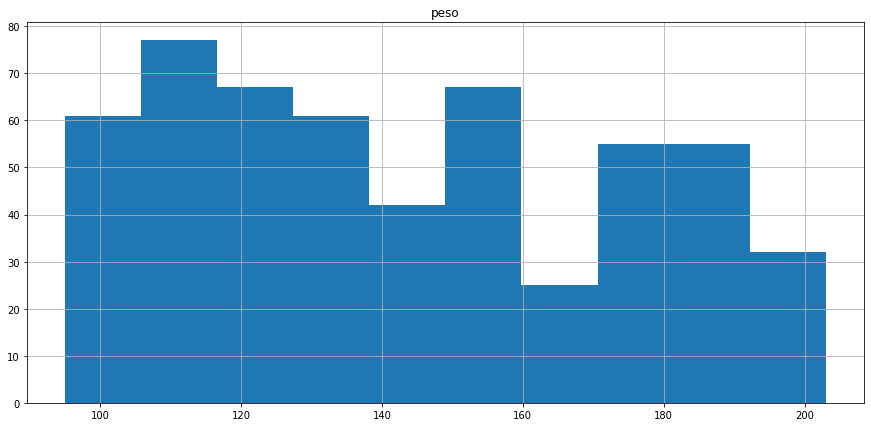

In [ ]:
# histograma com tamanho
clientes.hist(column='peso', figsize=(15,7))
plt.show()

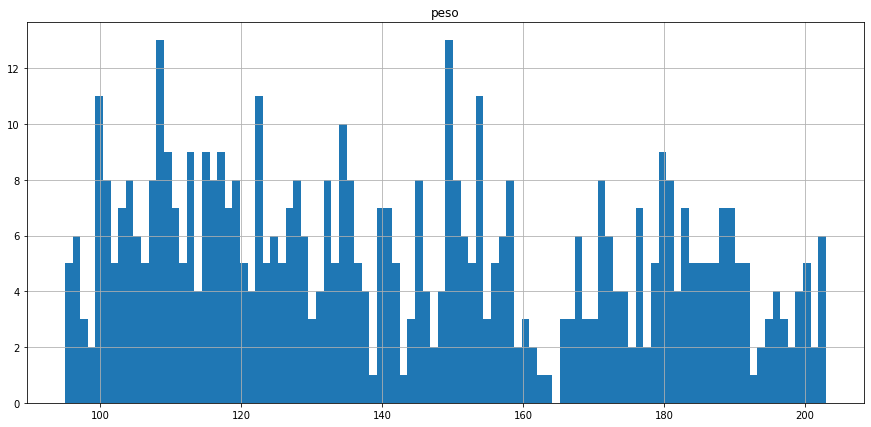

In [ ]:
# Histograma, com tamanho e pelo menos 100 colunas (bins)
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

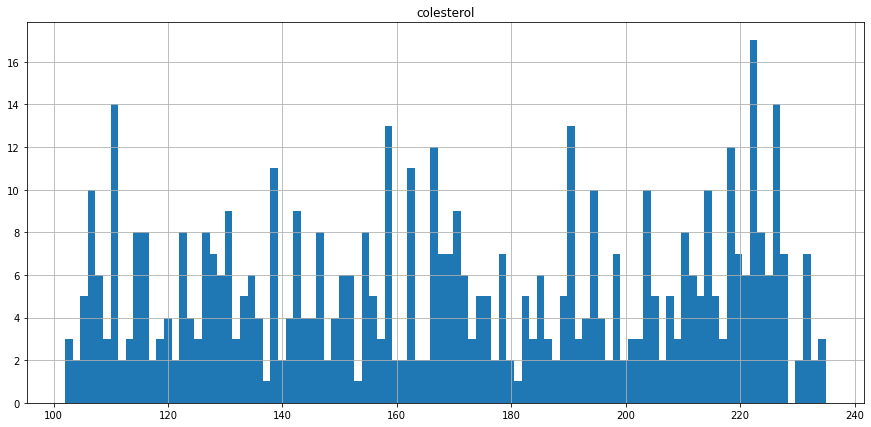

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

### Criando um identificador para a variável gênero - transformando númerico
Dados **categóricos** transformados em **numéricos**

In [ ]:
# importando biblioteza
from sklearn.preprocessing import LabelEncoder

In [ ]:
# dentro de Clientes, criar uma coluna 'genero_number' com a coluna 'genero' em bool
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [ ]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65c83e4640>]],
      dtype=object)

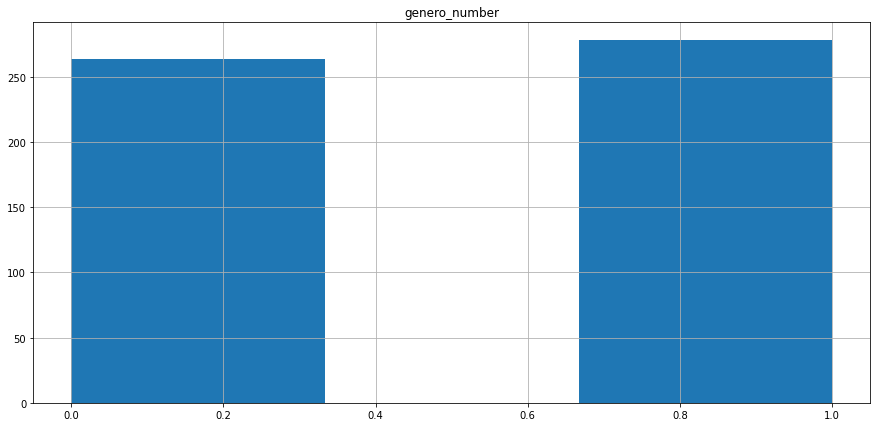

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

### Junções entre os dados coletados - JOIN

In [ ]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
# JOIN entre a TB clientes e TB estados onde tiver 'id_estado'
clientes_estados = pd.merge(clientes, estados, on='id_estado') # novo dataframe
clientes_estados.sort_values('id_estado') #ordenar

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
469,360,128.0,160,Feminino,1,0,Acre,ac,Brasil
463,38,96.0,105,Masculino,1,1,Acre,ac,Brasil
464,98,149.0,185,Feminino,1,0,Acre,ac,Brasil
465,104,118.0,140,Feminino,1,0,Acre,ac,Brasil
466,113,122.0,145,Masculino,1,1,Acre,ac,Brasil
...,...,...,...,...,...,...,...,...,...
239,89,124.0,148,Feminino,27,0,Tocantins,to,Brasil
238,80,123.0,147,Feminino,27,0,Tocantins,to,Brasil
236,18,168.0,204,Masculino,27,1,Tocantins,to,Brasil
244,244,158.0,195,Feminino,27,0,Tocantins,to,Brasil


In [ ]:
# JOIN entre Clientes e idades
base_completa = pd.merge(clientes_estados, idade, on= 'id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
# Reset no Indice
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
537,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
538,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
539,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
540,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


### Organizar a base de dados

Podemos realizae várias aterações na base de dados a fim de melhorar o entendiento e disposição das colunas. Além disso, podemos fazer transofrmações nos textos linhas e colunas

In [102]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente':'cod_cliente','genero_number':'cod_genero'}, inplace=True)

In [103]:
# Alterando as linhas da variável sigla_estado para MAIUSCULO
base_completa.sigla_estado.str.upper()

0      RR
1      DF
2      AM
3      SC
4      SE
       ..
537    RO
538    AC
539    CE
540    RN
541    ES
Name: sigla_estado, Length: 542, dtype: object

In [104]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [105]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


### Alterando disposição das colunas do arquivo de dados

Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização

In [106]:
base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [107]:
# Atribuindo a variável ao próprio DF e reset o index
base_completa = base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']].reset_index(drop=True)

In [108]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


## Análise dos dados

É a etapa onde selecionamos os algoritmos de Machine Learning que serão para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestererol, peso e idade das pessoas.

### Aplicando Método do cotovelo

Vamos Iniciar visualizando e identificando o número de clusters necessários para realizar o agrupamento

In [ ]:
from sklearn.cluster import KMeans


In [139]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dados_cliente) # x=dados_cliente
    wcss.append(kmeans.inertia_)
  return wcss


In [131]:
dados_cliente = base_completa[['peso','colesterol','idade']] # base contendo essas colunas
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44


In [140]:
wcss_clientes = calcular_wcss(dados_cliente)

In [141]:
type(wcss_clientes)

list

In [143]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui o valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui o valor de WCSS de: 1470179.8025830258
O cluster 1 possui o valor de WCSS de: 451449.94325422985
O cluster 2 possui o valor de WCSS de: 263522.9769953826
O cluster 3 possui o valor de WCSS de: 205103.61014654353
O cluster 4 possui o valor de WCSS de: 177057.170846051
O cluster 5 possui o valor de WCSS de: 149904.49477899563
O cluster 6 possui o valor de WCSS de: 128562.32406427534
O cluster 7 possui o valor de WCSS de: 109954.64507273637
O cluster 8 possui o valor de WCSS de: 92820.08038036956
O cluster 9 possui o valor de WCSS de: 81835.71035512564


### Visualizando o gráfico do cotovelo

In [166]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenização de gráficos

In [167]:
grafico_wcss = px.line( x = range (1,11),
                        y = wcss_clientes)

fig = go.Figure(grafico_wcss)

In [169]:
fig.update_layout( title= 'Calculando o WCSS',
                   xaxis_title= 'Número de Clusters',
                   yaxis_title= 'Valor do WCSS',
                   template= 'plotly_white')


fig.show()

In [172]:
# Criar uma variável 'kmeans_clientes', escolher o cluster nº 3, random_state=0 para ter os mesmos resultados
kmeans_clientes = KMeans(n_clusters=3, random_state=0)

# no conjunto 'base_completa' vai ser criado uma variável 'cluster', que vai executar o método KMeans, detemrinar os centroides e os conj. de dados
# e isso será acrescentado no conj. de base de dados do preedict
base_completa['cluster']=kmeans_clientes.fit_predict(dados_cliente)

In [173]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2
...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,1
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,2
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,0


### Claculando os centroides de cada cluster

In [175]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

# 03 conjuntos (0,1,2): peso, colesterol, idade

array([[110.25      , 125.62765957,  43.5212766 ],
       [182.18934911, 217.        ,  42.75147929],
       [141.77297297, 172.97837838,  41.99459459]])

In [176]:
dados_clientes

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44
...,...,...,...
537,172.0,207,20
538,129.0,157,66
539,107.0,115,36
540,117.0,147,57


Aqui temos os centroides dos 03 cluster de acordo com os atributos.
Nesse exemplo, vamos os centroides de 'peso, colesterol, idade' respectivamente.

In [178]:
grafico = px.scatter( x = base_completa['peso'],
                      y =  base_completa['colesterol'],
                      color =  base_completa['cluster'])

grafico_centroide = px.scatter ( x = centroides_clusters[:,0], 
                                 y = centroides_clusters[:,1],
                                 size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

###Visualizando e alterando o loyout do gráfico

In [181]:
grafico = px.scatter( x = base_completa['peso'],
                      y =  base_completa['colesterol'],
                      color =  base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title = 'Analise de Clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'peso')

fig.show()

### Criar função para gerar os Gráficos 
mais rápidos

In [203]:
def plotar_grafico(x,y, xlabel, y_label): # x , y, nome x, nome y
  grafico = px.scatter(x = x,
                       y = y,
                       color = base_completa['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title = 'Analise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,)

  fig.show()

In [204]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'],'colesterol','peso')

In [205]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso','colesterol')

In [206]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade','colesterol')

### Segmentar os clientes baseado nas análises dos clusters

Agora vamos analisar os dados dos clusters referentes aos atributos 'peso' e 'colesterol' e atribuir nomes que representem aquele agrupamento.

Vamos agrupas em 03 grupos



1.   Alto risto: peso e colesterol alto
2.   Baixo risco: Baixo peso e colesterol baixo
3.   Moderado risco: peso e colesterol madianos



In [207]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x],base_completa[y], x, y)

In [211]:
cluster_clientes = base_completa #cópia

In [213]:
# Segmentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Moderado Risco'
#Localizar a coluna 'cluster', criar uma coluna nova 'nome_cluster' e classificar

In [212]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0,Moderado Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0,Moderado Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0,Moderado Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2,Alto Risco
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,1,Baixo Risco
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,2,Alto Risco
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0,Moderado Risco
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,0,Moderado Risco


### Análisar os CLusters criados

In [214]:
# Verificar os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,185.0,41.994595,15.390390,16.0,29.0,42.0,54.0,70.0
Baixo Risco,169.0,42.751479,15.258402,16.0,31.0,43.0,56.0,69.0
Moderado Risco,188.0,43.521277,15.009251,17.0,31.0,42.0,57.0,70.0


In [215]:
# Verificar os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,185,27,Mato Grosso do Sul,12
Baixo Risco,169,27,Rio Grande do Sul,10
Moderado Risco,188,27,Amazonas,13


In [216]:
# QUERY = consultar dentro do conjunto de dados
cluster_clientes.query("nome_cluster =='Alto Risco' & estado == 'Mato Grosso do Sul'")

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
86,88,Feminino,25,140.0,168,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
170,174,Masculino,28,129.0,156,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
245,251,Feminino,19,154.0,195,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
290,296,Masculino,45,155.0,191,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
301,307,Feminino,22,126.0,152,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
436,442,Masculino,59,125.0,154,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
447,453,Feminino,25,145.0,176,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
450,456,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
458,464,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco
486,492,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil,2,Alto Risco


In [217]:
cluster_clientes.groupby(['nome_cluster','genero'])['peso'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Alto Risco     Feminino   110.0  142.181818  10.397761  124.0  134.00  141.0   
               Masculino   75.0  141.173333  10.416169  124.0  131.50  145.0   
Baixo Risco    Feminino    70.0  183.385714  10.488493  158.0  178.25  185.0   
               Masculino   99.0  181.343434  11.701353  159.0  172.00  180.0   
Moderado Risco Feminino    84.0  111.166667   7.829252   96.0  107.00  112.0   
               Masculino  104.0  109.509615   8.139554   95.0  103.00  108.0   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   152.75  159.0  
               Masculino  151.00  157.0  
Baixo Risco    Feminino   191.00  203.0  
               Masculino  188.00  203.0  
Moderado Risco Feminino   117.00  126.0  
               Masculino  117.00  126.0

### Exportando dados

In [220]:
cluster_clientes.to_csv('classificacao_clientes.csv',sep = ';', encoding='latin1')

# Extra


- Convertendo os tipos de dados para Float e Int

1.   to_numeric Método para converter colunas em valores numéricos em Pandas
2.   astype() Método para converter um tipo em qualquer outro tipo de dado
3. infer_objects() Método para converter o tipo de dado das colunas para um tipo mais específico

```
pd.to_numeric(s, downcast='integer'))
df[['second', 'third']].astype(float)

```


- Convertendo , por .
```
df['nome_da_coluna'].replace(",", ".",  inplace=True)
```
- visualizando o tipo de dados
- renomeando colunas 